**Assessment CLO-3: Tugas Besar Pemrograman Learning**

Topik regresi pada Dataset 15: 2D elastodynamic metamaterials menggunakan metode Naive Bayes

Kelompok: 9

Anggota:
1.   Nurul Izzah Abdussalam Zahra - 1301223385
2.   Awanda Puspa Larasati - 1301223101

Pada tugas besar mata kuliah Pengantar Kecerdasan Buatan ini, kami memilih dataset 15 yang berjudul "2D elastodynamic metamaterials" sebagai bahan analisis.

Import Library untuk data preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Dataset


https://archive.ics.uci.edu/dataset/692/2d+elastodynamic+metamaterials

Import dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Miuura/Haloo/main/data.csv', encoding='latin1')

Menampilkan banyak dataset dan head dataset

In [ ]:
print(len(dataset))
print(dataset.head())

20520
   CondensedBinary2DGeometry  BandGapLocation  BandGapWidth
0                       10.0       497.011658     22.697266
1                       11.0       467.929018     85.654936
2                      100.0       687.636705     37.409815
3                      101.0       721.282777     61.604756
4                      110.0       464.347767     46.354707


Memeriksa nilai yang hilang

In [ ]:
print("\nMissing Values:")
print(dataset.isnull().sum())


Missing Values:
CondensedBinary2DGeometry    0
BandGapLocation              0
BandGapWidth                 0
dtype: int64


Mengecek Outlier

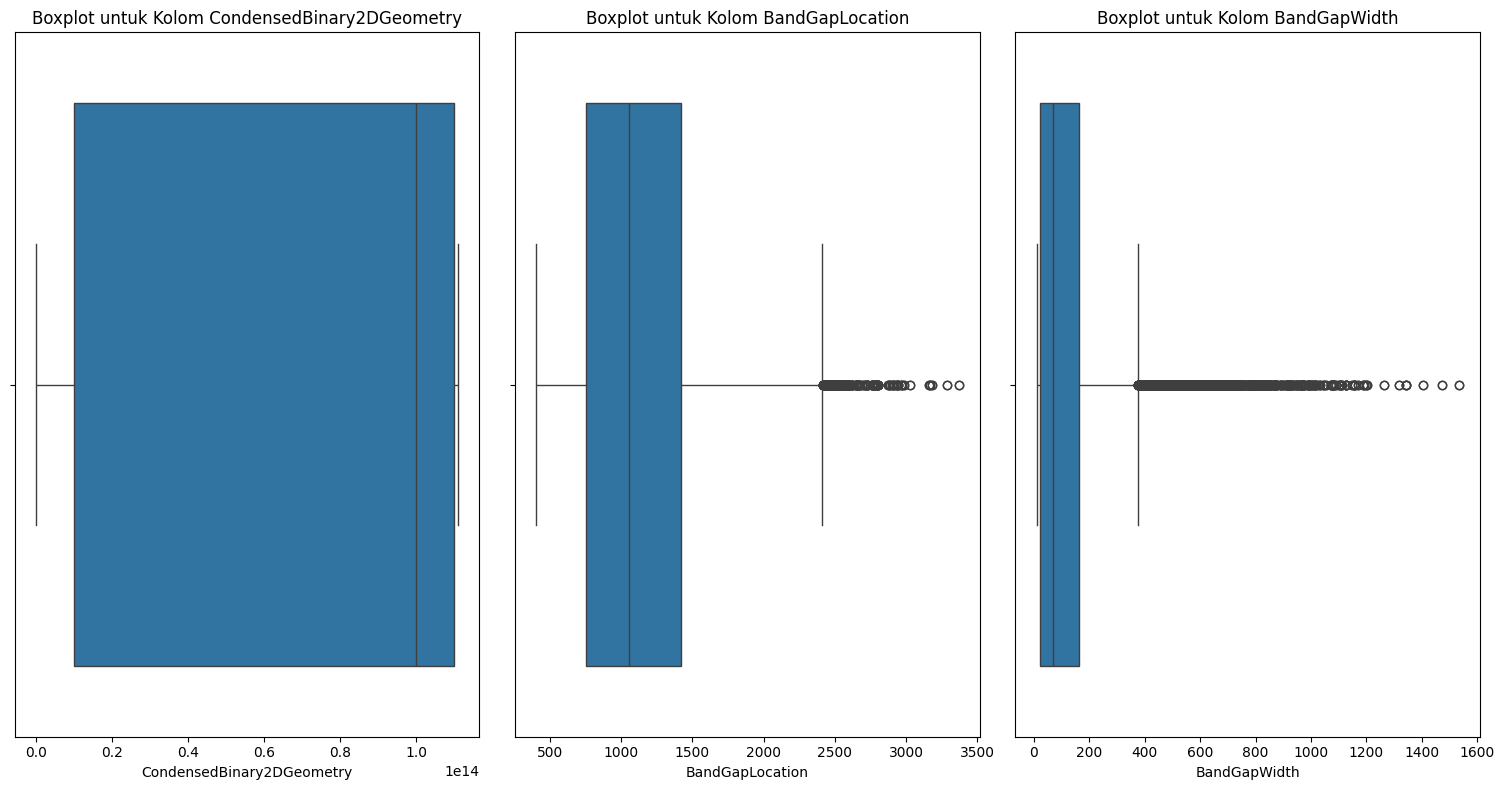

In [ ]:
num_cols = len(dataset.select_dtypes(include=['int', 'float']).columns)
plt.figure(figsize=(15, 8))
rows = (num_cols + 2) // 3
for i, col in enumerate(dataset.select_dtypes(include=['int', 'float']).columns):
  plt.subplot(rows, 3, i+1)
  sns.boxplot(x=dataset[col])
  plt.title(f'Boxplot untuk Kolom {col}')
plt.tight_layout()
plt.show()

 Menangani Outliers

In [ ]:
# metode IQR
def handle_outliers(data,column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
  return data

for col in dataset.select_dtypes(include=['int', 'float']).columns:
  dataset = handle_outliers(dataset, col)

print("Outliers were successfully handled")

Outliers were successfully handled


Cek Outliers

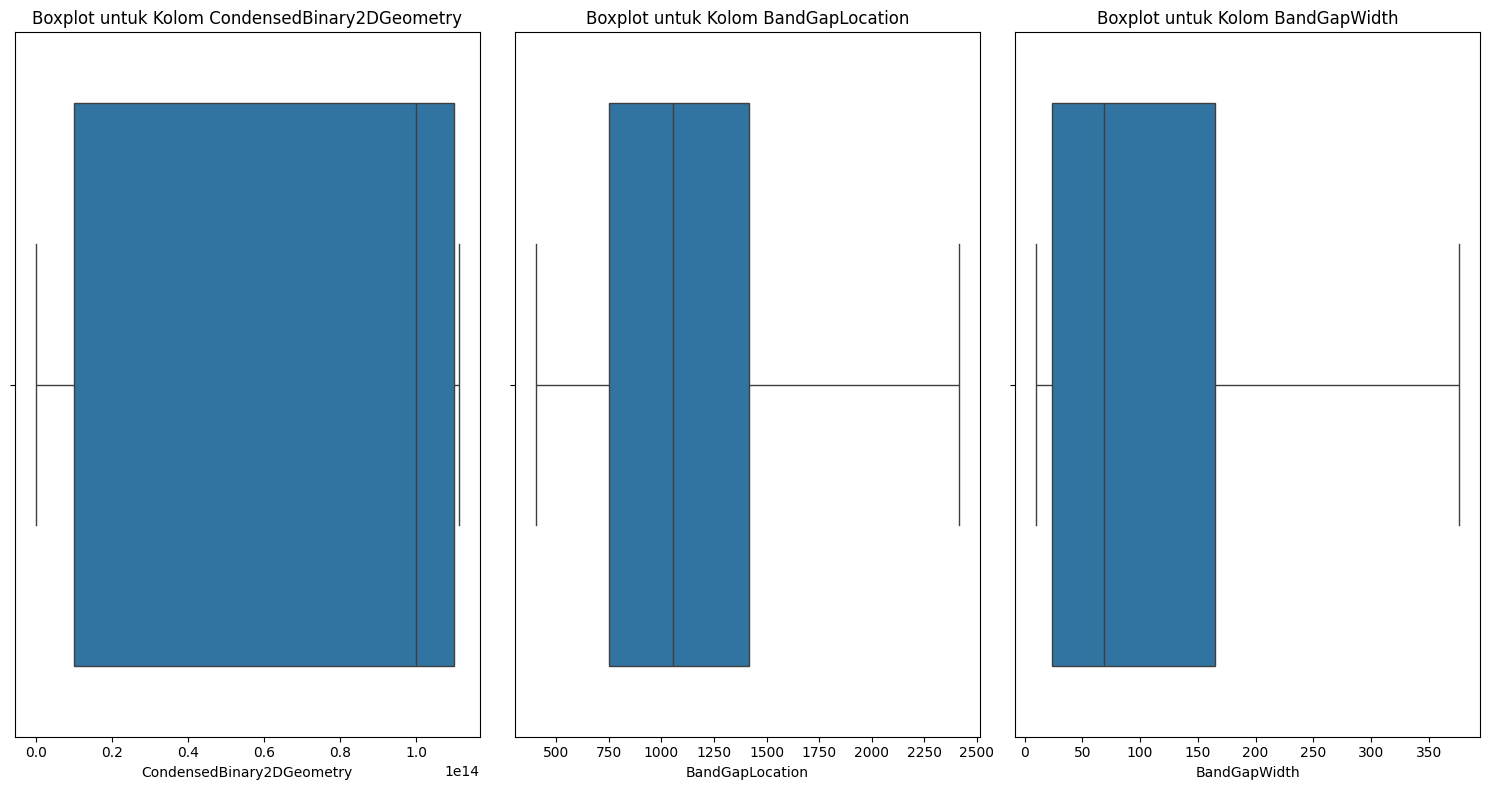

In [ ]:
num_cols = len(dataset.select_dtypes(include=['int', 'float']).columns)
plt.figure(figsize=(15, 8))
rows = (num_cols + 2) // 3
for i, col in enumerate(dataset.select_dtypes(include=['int', 'float']).columns):
  plt.subplot(rows, 3, i+1)
  sns.boxplot(x=dataset[col])
  plt.title(f'Boxplot untuk Kolom {col}')
plt.tight_layout()
plt.show()

In [ ]:
dataset.head()

,CondensedBinary2DGeometry,BandGapLocation,BandGapWidth
0,10.0,497.011658,22.697266
1,11.0,467.929018,85.654936
2,100.0,687.636705,37.409815
3,101.0,721.282777,61.604756
4,110.0,464.347767,46.354707


Membagi dataset menjadi X, Y, dan Z

In [ ]:
X = dataset[["CondensedBinary2DGeometry"]] #kolom ini merupakan kolom dengan variabel independent
y = dataset[["BandGapLocation"]] #kolom ini merupakan kolom dengan variabel dependent 1
z = dataset[["BandGapWidth"]] #kolom ini merupakan kolom dengan variabel dependent 2

Menampilkan lima baris pertama dari X

In [ ]:
print("head of X:")
print(X[:5])

head of X:
   CondensedBinary2DGeometry
0                       10.0
1                       11.0
2                      100.0
3                      101.0
4                      110.0


Menampilkan lima baris pertama dari Y

In [ ]:
print("head of Y:")
print(y[:5])

head of Y:
   BandGapLocation
0       497.011658
1       467.929018
2       687.636705
3       721.282777
4       464.347767


Menampilkan lima baris pertama dari Z

In [ ]:
print("head of Z:")
print(z[:5])

head of Z:
   BandGapWidth
0     22.697266
1     85.654936
2     37.409815
3     61.604756
4     46.354707


Memisahkan dataset menjadi Data Latih (training set) dan Data Uji (test set)

In [ ]:
#Mengubah nilai target kontinyu menjadi diskrit
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
y_binned = kbins.fit_transform(y.values.reshape(-1,1)).astype(int).ravel()
z_binned = kbins.fit_transform(z.values.reshape(-1,1)).astype(int).ravel()

**Variabel dependen pertama: BandGapLocation**

In [ ]:
#Memisahkan dataset menjadi training set dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y_binned, test_size = 0.25, random_state=100)

In [ ]:
#Memastikan X_train dan X_test adalah 2D array
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [ ]:
# Normalisasi dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Data Training dengan Naive Bayes

In [ ]:
#Import beberapa modules
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
nb=GaussianNB()
nb.fit(X_train_scaled, Y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(X_test_scaled)
mse1 = mean_squared_error(Y_test, y_pred)
y_pred_train = nb.predict(X_train_scaled)
mse_train1 = mean_squared_error(Y_train, y_pred_train)
print("MSE with Naive Bayes method (train data): ", mse_train1)
print("MSE with Naive Bayes method (test data): ", mse1)

MSE with Naive Bayes method (train data):  9.742755035737492
MSE with Naive Bayes method (test data):  9.61364522417154


In [ ]:
#Perhitungan mean MSE dengan CV = 5
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores1 = -scores
print("Mean MSE:", mse_scores1.mean())

Mean MSE: 9.742755035737492


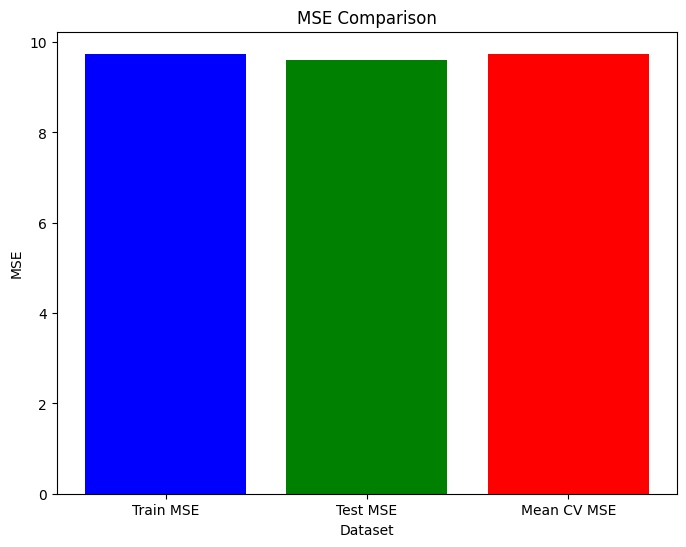

In [ ]:
mean_mse_cv = mse_scores1.mean()
mse_values = [mse_train1, mse1, mean_mse_cv]
labels = ['Train MSE', 'Test MSE', 'Mean CV MSE']

plt.figure(figsize=(8, 6))
plt.bar(labels, mse_values, color=['blue', 'green', 'red'])
plt.xlabel('Dataset')
plt.ylabel('MSE')
plt.title('MSE Comparison')
plt.show()

- MSE pada data pelatihan dan pengujian sangat mirip, menunjukkan bahwa model Naive Bayes yang dilatih tidak overfitting atau underfitting terhadap data pelatihan. Ini berarti model memiliki performa yang konsisten baik pada data yang telah dilatih maupun pada data yang belum pernah dilihat sebelumnya.
- Mean MSE dari validasi silang juga sangat dekat dengan MSE pada data pelatihan, yang menunjukkan bahwa model Naive Bayes memiliki generalisasi yang baik. Validasi silang memberikan gambaran yang lebih akurat tentang kinerja model pada data yang tidak terlihat dan memastikan bahwa hasil tidak hanya karena kebetulan dari satu pembagian data pelatihan/test tertentu.
- Nilai MSE yang relatif tinggi (sekitar 9.74) menunjukkan bahwa ada kesalahan prediksi yang signifikan ketika model memprediksi kelas diskrit dari variabel dependent (BandGapLocation). Ini bisa menunjukkan bahwa model Naive Bayes mungkin tidak sepenuhnya cocok untuk data ini atau fitur yang digunakan (CondensedBinary2DGeometry) mungkin tidak cukup untuk memprediksi variabel target dengan baik.

Data Training dengan Catboost Regressor

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
cb = CatBoostRegressor(random_state= 42 , iterations= 1000, learning_rate= 0.1)
cb.fit(X_train_scaled, Y_train)

y_test_pred = cb.predict(X_test_scaled)
test_score= mean_squared_error(Y_test, y_test_pred)

print(test_score)

0:	learn: 2.2638788	total: 26.8ms	remaining: 26.8s
1:	learn: 2.2543487	total: 43.6ms	remaining: 21.7s
2:	learn: 2.2452281	total: 49.6ms	remaining: 16.5s
3:	learn: 2.2360766	total: 58.3ms	remaining: 14.5s
4:	learn: 2.2287945	total: 72.9ms	remaining: 14.5s
5:	learn: 2.2215464	total: 86.3ms	remaining: 14.3s
6:	learn: 2.2174705	total: 90.3ms	remaining: 12.8s
7:	learn: 2.2148271	total: 102ms	remaining: 12.6s
8:	learn: 2.2089901	total: 119ms	remaining: 13.1s
9:	learn: 2.2038596	total: 136ms	remaining: 13.5s
10:	learn: 2.2002784	total: 149ms	remaining: 13.4s
11:	learn: 2.1977278	total: 162ms	remaining: 13.4s
12:	learn: 2.1952753	total: 169ms	remaining: 12.8s
13:	learn: 2.1931216	total: 175ms	remaining: 12.3s
14:	learn: 2.1899822	total: 187ms	remaining: 12.3s
15:	learn: 2.1874751	total: 202ms	remaining: 12.4s
16:	learn: 2.1854056	total: 216ms	remaining: 12.5s
17:	learn: 2.1839224	total: 229ms	remaining: 12.5s
18:	learn: 2.1819242	total: 247ms	remaining: 12.7s
19:	learn: 2.1803377	total: 258ms	

In [ ]:
y_train_pred = cb.predict(X_train_scaled)
test_score= mean_squared_error(Y_train, y_train_pred)

print(test_score)
y_pred = cb.predict(X_test_scaled)
mseC1 = mean_squared_error(Y_test, y_pred)
y_pred_train = cb.predict(X_train_scaled)
mse_trainC1 = mean_squared_error(Y_train, y_pred_train)
print("MSE with Catboost Regression (train data): ", mse_trainC1)
print("MSE with Catboost Regression (test data): ", mseC1)

4.1322702223288825
MSE with Catboost Regression (train data):  4.1322702223288825
MSE with Catboost Regression (test data):  4.1826204346254325


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cb, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
mse_scoresc1 = -scores
print("Mean MSE:", mse_scoresc1.mean())

Streaming output truncated to the last 5000 lines.
1:	learn: 2.2567440	total: 10.9ms	remaining: 5.45s
2:	learn: 2.2472231	total: 17.7ms	remaining: 5.89s
3:	learn: 2.2409488	total: 30ms	remaining: 7.47s
4:	learn: 2.2365176	total: 41.5ms	remaining: 8.26s
5:	learn: 2.2301655	total: 57.5ms	remaining: 9.53s
6:	learn: 2.2257812	total: 67ms	remaining: 9.51s
7:	learn: 2.2230866	total: 73.2ms	remaining: 9.08s
8:	learn: 2.2169068	total: 79.6ms	remaining: 8.77s
9:	learn: 2.2121912	total: 87.3ms	remaining: 8.64s
10:	learn: 2.2083096	total: 91.9ms	remaining: 8.26s
11:	learn: 2.2047309	total: 97.5ms	remaining: 8.02s
12:	learn: 2.2017961	total: 103ms	remaining: 7.83s
13:	learn: 2.1994055	total: 110ms	remaining: 7.76s
14:	learn: 2.1958884	total: 114ms	remaining: 7.48s
15:	learn: 2.1929623	total: 120ms	remaining: 7.4s
16:	learn: 2.1908524	total: 126ms	remaining: 7.3s
17:	learn: 2.1892292	total: 133ms	remaining: 7.25s
18:	learn: 2.1863038	total: 138ms	remaining: 7.11s
19:	learn: 2.1845456	total: 144ms	r

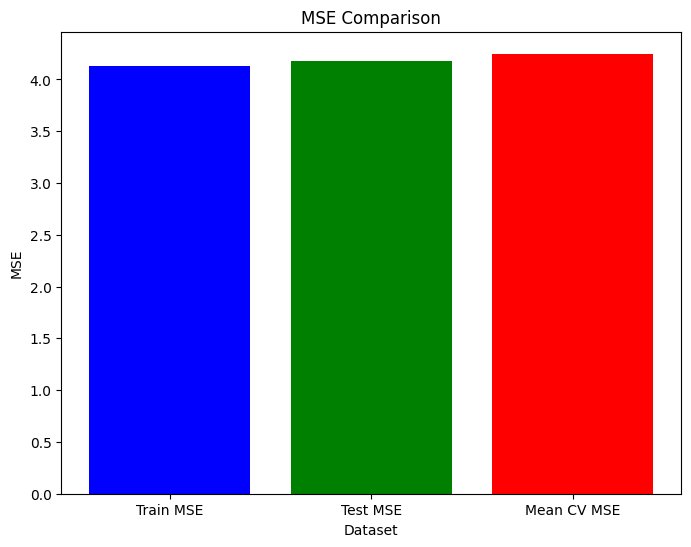

In [ ]:
mean_mse_cv1 = mse_scoresc1.mean()
mse_values = [mse_trainC1, mseC1, mean_mse_cv1]
labels = ['Train MSE', 'Test MSE', 'Mean CV MSE']

plt.figure(figsize=(8, 6))
plt.bar(labels, mse_values, color=['blue', 'green', 'red'])
plt.xlabel('Dataset')
plt.ylabel('MSE')
plt.title('MSE Comparison')
plt.show()

- MSE pada data pelatihan dan pengujian cukup rendah dan sangat mirip satu sama lain, menunjukkan bahwa model CatBoost Regression tidak mengalami overfitting atau underfitting secara signifikan. Ini menunjukkan bahwa model dapat belajar dari data pelatihan dengan baik dan memiliki performa yang baik pada data yang tidak terlihat sebelumnya.
- Mean MSE dari validasi silang sedikit lebih tinggi tetapi masih mendekati nilai MSE pada data pelatihan dan pengujian. Ini menunjukkan bahwa model CatBoost Regression memiliki kemampuan generalisasi yang baik dan performanya konsisten ketika divalidasi dengan beberapa subset data.
- Nilai MSE yang lebih rendah (sekitar 4.13 hingga 4.25) menunjukkan bahwa model CatBoost Regression memiliki kemampuan prediksi yang lebih baik dibandingkan dengan model Naive Bayes yang sebelumnya memiliki MSE sekitar 9.74. Ini berarti CatBoost Regression lebih efektif dalam menangkap hubungan antara fitur (CondensedBinary2DGeometry) dan target (BandGapLocation).

**Variabel dependen kedua: BandGapWidth**

In [ ]:
#Memisahkan dataset menjadi training set dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, Z_train, Z_test = train_test_split(X, z_binned, test_size = 0.25, random_state=50)

In [ ]:
#Memastikan X_train dan X_test adalah 2D array
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [ ]:
# Normalisasi dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Data Training dengan Naive Bayes

In [ ]:
#Import beberapa modules
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
nb=GaussianNB()
nb.fit(X_train_scaled, Z_train)

GaussianNB()

In [ ]:
z_pred = nb.predict(X_test_scaled)
mse2 = mean_squared_error(Z_test, z_pred)
z_pred_train = nb.predict(X_train_scaled)
mse_train2 = mean_squared_error(Z_train, z_pred_train)
print("MSE with Naive Bayes method (train data): ", mse_train2)
print("MSE with Naive Bayes method (test data): ", mse2)

MSE with Naive Bayes method (train data):  14.84990253411306
MSE with Naive Bayes method (test data):  14.602729044834309


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X_train_scaled, Z_train, cv=5, scoring='neg_mean_squared_error')
mse_scores2 = -scores
print("Mean MSE:", mse_scores2.mean())

Mean MSE: 14.84990253411306


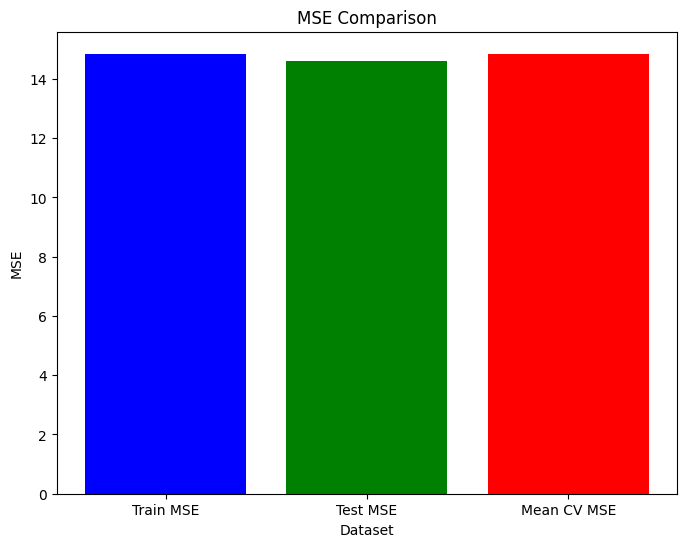

In [ ]:
mean_mse_cv2 = mse_scores2.mean()
mse_values = [mse_train2, mse2, mean_mse_cv2]
labels = ['Train MSE', 'Test MSE', 'Mean CV MSE']

plt.figure(figsize=(8, 6))
plt.bar(labels, mse_values, color=['blue', 'green', 'red'])
plt.xlabel('Dataset')
plt.ylabel('MSE')
plt.title('MSE Comparison')
plt.show()

- Nilai MSE pada data pelatihan dan pengujian cukup tinggi dan sangat mirip satu sama lain. Ini menunjukkan bahwa model Naive Bayes tidak overfitting atau underfitting secara signifikan, tetapi performanya secara keseluruhan kurang baik.
- Mean MSE dari validasi silang sama dengan nilai MSE pada data pelatihan, menunjukkan bahwa model memiliki performa yang konsisten ketika divalidasi dengan beberapa subset data. Namun, nilai MSE yang tinggi menandakan bahwa model tidak memprediksi dengan akurasi yang baik.
- Nilai MSE yang tinggi (sekitar 14.85) menunjukkan bahwa model Naive Bayes tidak cocok untuk data ini atau bahwa fitur yang digunakan (CondensedBinary2DGeometry) tidak cukup informatif untuk memprediksi variabel target (BandGapLocation) dengan akurasi yang baik.

Data training dengan Catboost Regressor

In [ ]:
cb = CatBoostRegressor(random_state= 42 , iterations= 1000, learning_rate= 0.1)
cb.fit(X_train_scaled, Z_train)

z_test_pred = cb.predict(X_test_scaled)
test_score= mean_squared_error(Z_test, z_test_pred)

print(test_score)

0:	learn: 2.9929639	total: 2.83ms	remaining: 2.83s
1:	learn: 2.9881776	total: 6.25ms	remaining: 3.12s
2:	learn: 2.9849820	total: 8.98ms	remaining: 2.98s
3:	learn: 2.9801133	total: 11.7ms	remaining: 2.91s
4:	learn: 2.9759615	total: 14.3ms	remaining: 2.85s
5:	learn: 2.9728614	total: 16.8ms	remaining: 2.78s
6:	learn: 2.9702497	total: 19.5ms	remaining: 2.76s
7:	learn: 2.9681909	total: 22.1ms	remaining: 2.73s
8:	learn: 2.9659812	total: 24.8ms	remaining: 2.73s
9:	learn: 2.9642887	total: 27.9ms	remaining: 2.76s
10:	learn: 2.9629568	total: 31ms	remaining: 2.78s
11:	learn: 2.9616444	total: 34.1ms	remaining: 2.81s
12:	learn: 2.9602199	total: 38.1ms	remaining: 2.9s
13:	learn: 2.9584587	total: 40.9ms	remaining: 2.88s
14:	learn: 2.9565559	total: 43.8ms	remaining: 2.88s
15:	learn: 2.9550744	total: 46.2ms	remaining: 2.84s
16:	learn: 2.9540924	total: 48.8ms	remaining: 2.82s
17:	learn: 2.9525093	total: 51.5ms	remaining: 2.81s
18:	learn: 2.9507852	total: 54.3ms	remaining: 2.8s
19:	learn: 2.9500332	total

In [ ]:
z_train_pred = cb.predict(X_train_scaled)
test_score2= mean_squared_error(Z_train, z_train_pred)

print(test_score2)
z_pred = cb.predict(X_test_scaled)
mseC2 = mean_squared_error(Z_test, z_pred)
z_pred_train = cb.predict(X_train_scaled)
mse_trainC2 = mean_squared_error(Z_train, z_pred_train)
print("MSE with Catboost Regression (train data): ", mse_trainC2)
print("MSE with Catboost Regression (test data): ", mseC2)

8.163694458266637
MSE with Catboost Regression (train data):  8.163694458266637
MSE with Catboost Regression (test data):  8.440014759492344


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cb, X_train_scaled, Z_train, cv=5, scoring='neg_mean_squared_error')
mse_scoresc2 = -scores
print("Mean MSE:", mse_scoresc2.mean())

Streaming output truncated to the last 5000 lines.
1:	learn: 2.9766431	total: 15.1ms	remaining: 7.55s
2:	learn: 2.9726515	total: 22.2ms	remaining: 7.37s
3:	learn: 2.9693143	total: 42.2ms	remaining: 10.5s
4:	learn: 2.9668305	total: 52ms	remaining: 10.3s
5:	learn: 2.9635383	total: 57.1ms	remaining: 9.46s
6:	learn: 2.9605632	total: 67.5ms	remaining: 9.58s
7:	learn: 2.9590256	total: 77.7ms	remaining: 9.64s
8:	learn: 2.9560905	total: 90.2ms	remaining: 9.93s
9:	learn: 2.9542298	total: 95.6ms	remaining: 9.47s
10:	learn: 2.9523688	total: 106ms	remaining: 9.57s
11:	learn: 2.9510508	total: 116ms	remaining: 9.55s
12:	learn: 2.9492898	total: 127ms	remaining: 9.61s
13:	learn: 2.9477586	total: 138ms	remaining: 9.75s
14:	learn: 2.9456465	total: 150ms	remaining: 9.88s
15:	learn: 2.9441341	total: 154ms	remaining: 9.46s
16:	learn: 2.9431010	total: 156ms	remaining: 9.03s
17:	learn: 2.9419581	total: 167ms	remaining: 9.09s
18:	learn: 2.9408545	total: 178ms	remaining: 9.21s
19:	learn: 2.9399231	total: 181ms

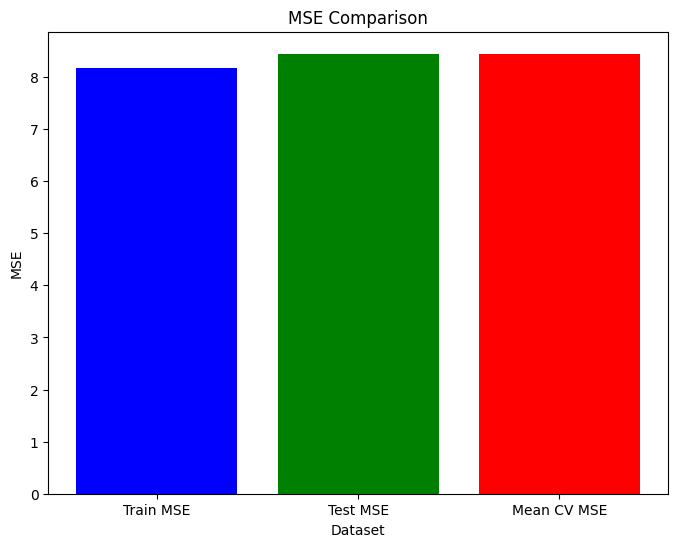

In [ ]:
mean_mse_cv3 = mse_scoresc2.mean()
mse_values = [mse_trainC2, mseC2, mean_mse_cv3]
labels = ['Train MSE', 'Test MSE', 'Mean CV MSE']

plt.figure(figsize=(8, 6))
plt.bar(labels, mse_values, color=['blue', 'green', 'red'])
plt.xlabel('Dataset')
plt.ylabel('MSE')
plt.title('MSE Comparison')
plt.show()

- Nilai MSE pada data pelatihan dan pengujian cukup dekat satu sama lain, menunjukkan bahwa model CatBoost Regression tidak mengalami overfitting atau underfitting secara signifikan. Model memiliki performa yang konsisten baik pada data pelatihan maupun data pengujian.
- Mean MSE dari validasi silang sedikit lebih tinggi dibandingkan dengan MSE pada data pelatihan tetapi masih dalam rentang yang dekat. Ini menunjukkan bahwa model CatBoost Regression memiliki kemampuan generalisasi yang baik dan performanya konsisten ketika divalidasi dengan beberapa subset data.
- Nilai MSE (sekitar 8.16 hingga 8.44) menunjukkan bahwa model CatBoost Regression memiliki kemampuan prediksi yang lebih baik dibandingkan dengan model Naive Bayes yang sebelumnya memiliki MSE sekitar 14.85. Ini berarti CatBoost Regression lebih efektif dalam menangkap hubungan antara fitur (CondensedBinary2DGeometry) dan target (BandGapLocation).

**ANALISIS DAN KESIMPULAN**

Test Set Results:
                Model       MSE
0         Naïve Bayes  9.613645
1  Catboost Regressor  4.182620

Training Set Results:
                Model       MSE
0         Naïve Bayes  9.742755
1  Catboost Regressor  4.132270


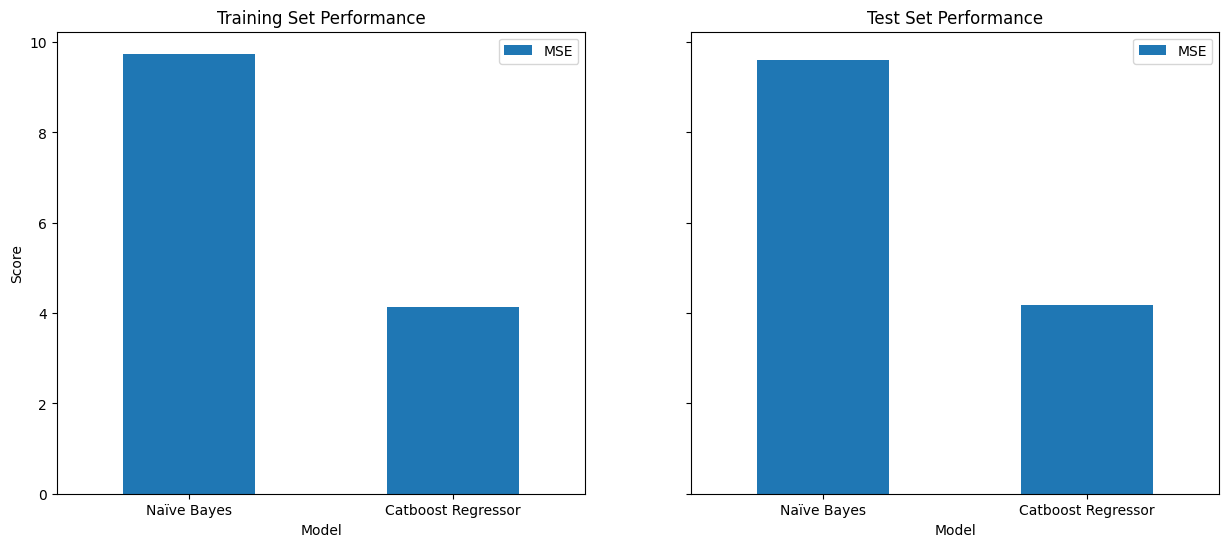

In [ ]:
#Perbandingan MSE variabel dependen 1
test1 = pd.DataFrame({
    'Model': ['Naïve Bayes', 'Catboost Regressor'],
    'MSE': [mse1, mseC1]
})

train1 = pd.DataFrame({
    'Model': ['Naïve Bayes', 'Catboost Regressor'],
    'MSE': [mse_train1, mse_trainC1]
})

print("Test Set Results:")
print(test1)
print("\nTraining Set Results:")
print(train1)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

train1.set_index('Model').plot(kind='bar', ax=axes[0], title='Training Set Performance')
test1.set_index('Model').plot(kind='bar', ax=axes[1], title='Test Set Performance')

for ax in axes:
    ax.set_ylabel('Score')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

Test Set Results:
                Model        MSE
0         Naïve Bayes  14.602729
1  Catboost Regressor   8.440015

Training Set Results:
                Model        MSE
0         Naïve Bayes  14.849903
1  Catboost Regressor   8.163694


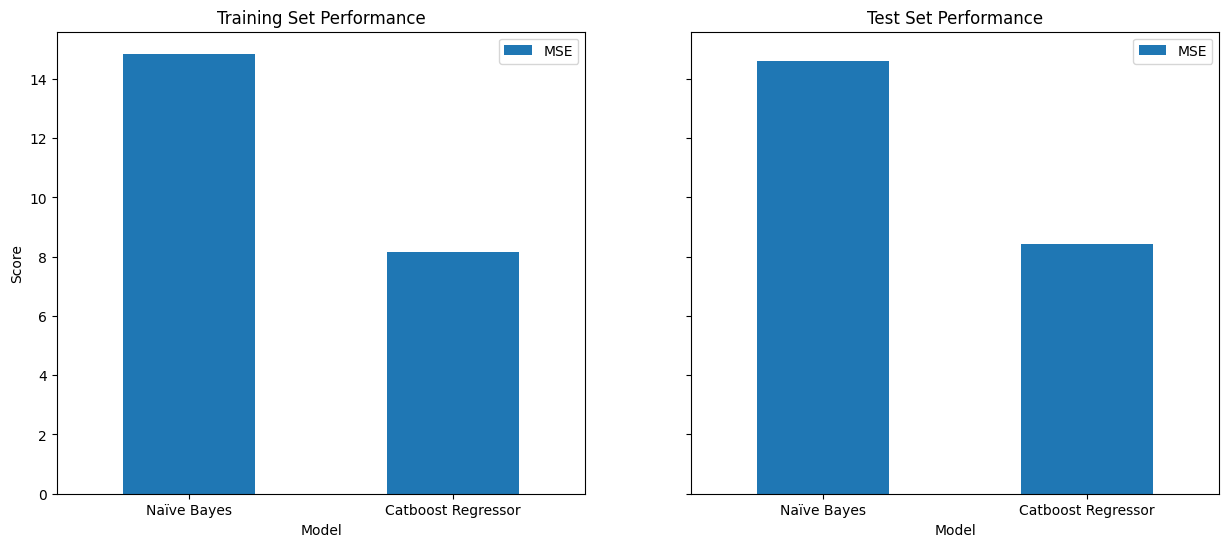

In [ ]:
#Perbandingan variabel dependen 2
test1 = pd.DataFrame({
    'Model': ['Naïve Bayes', 'Catboost Regressor'],
    'MSE': [mse2, mseC2]
})

train1 = pd.DataFrame({
    'Model': ['Naïve Bayes', 'Catboost Regressor'],
    'MSE': [mse_train2, mse_trainC2]
})

print("Test Set Results:")
print(test1)
print("\nTraining Set Results:")
print(train1)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

train1.set_index('Model').plot(kind='bar', ax=axes[0], title='Training Set Performance')
test1.set_index('Model').plot(kind='bar', ax=axes[1], title='Test Set Performance')

for ax in axes:
    ax.set_ylabel('Score')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

BandGapLocation:
                Model  CV score
0         Naïve Bayes  9.742755
1  Catboost Regressor  4.248269

BandGapWidth:
                Model   CV score
0         Naïve Bayes  14.849903
1  Catboost Regressor   8.445556


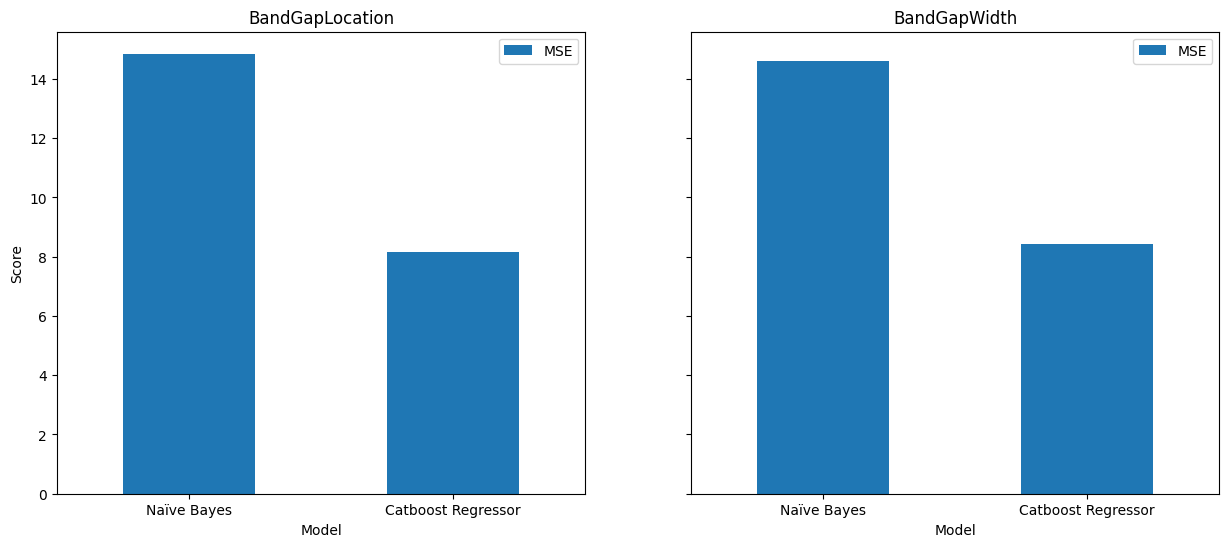

In [ ]:
#Perbandingan Cross Validation Score
var1 = pd.DataFrame({
    'Model': ['Naïve Bayes', 'Catboost Regressor'],
    'CV score': [mse_scores1.mean(), mse_scoresc1.mean()]
})

var2 = pd.DataFrame({
    'Model': ['Naïve Bayes', 'Catboost Regressor'],
    'CV score': [mse_scores2.mean(), mse_scoresc2.mean()]
})

print("BandGapLocation:")
print(var1)
print("\nBandGapWidth:")
print(var2)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

train1.set_index('Model').plot(kind='bar', ax=axes[0], title='BandGapLocation')
test1.set_index('Model').plot(kind='bar', ax=axes[1], title='BandGapWidth')

for ax in axes:
    ax.set_ylabel('Score')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

1. Naive Bayes method memiliki MSE yang lebih tinggi baik pada data latih maupun data uji dibandingkan dengan Catboost Regressor. Ini menunjukkan bahwa Naive Bayes method memiliki kinerja yang lebih rendah dalam memodelkan dan memprediksi data dibandingkan dengan Catboost Regressor.
2. Tidak terlihat indikasi overfitting karena kedua metode memiliki MSE yang relatif serupa di antara MSE data latih dan data uji serta Cross Validation Score.
3. Catboost Regressor memiliki cross-validation score yang lebih rendah dibandingkan dengan Naive Bayes. Ini menunjukkan bahwa Catboost Regressor memiliki kinerja yang lebih baik dalam memodelkan dan memprediksi data secara umum.